In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
import os
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import lit
from pyspark.sql.functions import format_number, col
from pyspark.sql.functions import when
import operator
import numpy as np
import pandas as pd

In [2]:
spark = SparkSession.builder.appName('WineQuality').getOrCreate()
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [3]:
df_w = spark.read.csv('White Wine Dataset.csv',header=True,inferSchema=True)
df_r = spark.read.csv('Red Wine Dataset.csv',header=True,inferSchema=True)

In [4]:
# "White" presents the white wine while "Red" presnts the red wine
df_w_withcolor = df_w.withColumn("Wine color", lit('White'))
df_w_withcolor.show()

df_r_withcolor = df_r.withColumn("Wine color", lit('Red'))
df_r_withcolor.show()

+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+----------+
|fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density|  pH|sulphates|alcohol|quality|Wine color|
+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+----------+
|          7.0|            0.27|       0.36|          20.7|    0.045|               45.0|               170.0|  1.001| 3.0|     0.45|    8.8|      6|     White|
|          6.3|             0.3|       0.34|           1.6|    0.049|               14.0|               132.0|  0.994| 3.3|     0.49|    9.5|      6|     White|
|          8.1|            0.28|        0.4|           6.9|     0.05|               30.0|                97.0| 0.9951|3.26|     0.44|   10.1|      6|     White|
|          7.2|            0.23|  

In [5]:
# union the df_white and df_red
df_all = df_w_withcolor.unionAll(df_r_withcolor)
df_all.show()

# data set size
print(df_all.count())

# Print schema allows us to visualise the data structure at a high level. 
df_all.printSchema()

# We can also use head to print a specific amount of rows, so we can get a better understanding of the data points. 
# Note that we have to specify 'print' depending on the method we're using. Otherwise it may not show up!
print(df_all.head(1))

+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+----------+
|fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density|  pH|sulphates|alcohol|quality|Wine color|
+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+----------+
|          7.0|            0.27|       0.36|          20.7|    0.045|               45.0|               170.0|  1.001| 3.0|     0.45|    8.8|      6|     White|
|          6.3|             0.3|       0.34|           1.6|    0.049|               14.0|               132.0|  0.994| 3.3|     0.49|    9.5|      6|     White|
|          8.1|            0.28|        0.4|           6.9|     0.05|               30.0|                97.0| 0.9951|3.26|     0.44|   10.1|      6|     White|
|          7.2|            0.23|  

In [6]:
# We can use the describe method get some general statistics on our data too. 
df_all.toPandas().describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
df_all.show(5)

+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+----------+
|fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density|  pH|sulphates|alcohol|quality|Wine color|
+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+----------+
|          7.0|            0.27|       0.36|          20.7|    0.045|               45.0|               170.0|  1.001| 3.0|     0.45|    8.8|      6|     White|
|          6.3|             0.3|       0.34|           1.6|    0.049|               14.0|               132.0|  0.994| 3.3|     0.49|    9.5|      6|     White|
|          8.1|            0.28|        0.4|           6.9|     0.05|               30.0|                97.0| 0.9951|3.26|     0.44|   10.1|      6|     White|
|          7.2|            0.23|  

+----------+------------------+
|Wine color|   Average quality|
+----------+------------------+
|     White|  5.87790935075541|
|       Red|5.6360225140712945|
+----------+------------------+

root
 |-- Wine color: string (nullable = false)
 |-- Average quality: double (nullable = true)



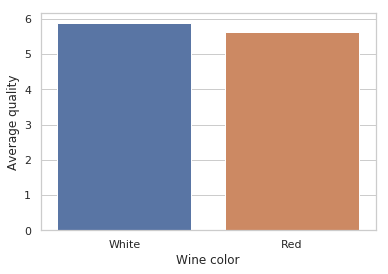

In [8]:
# data exploration
# means by wine color
df_color_avg = df_all.select('Wine color', 'quality').groupBy('Wine color').mean('quality')
df_color_avg = df_color_avg.select(col('Wine color').alias('Wine color'),
                                   col('avg(quality)').alias('Average quality'))
df_color_avg.show()
df_color_avg.printSchema()

sns.barplot(x='Wine color', y='Average quality', data=df_color_avg.toPandas())

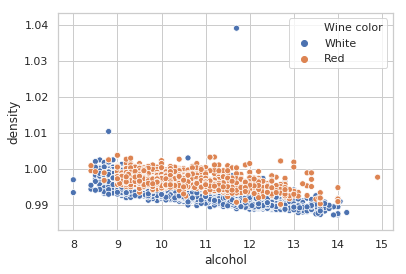

In [9]:
# alcohol vs density
sns.scatterplot(x='alcohol', y='density', data=df_all.toPandas(), hue='Wine color')

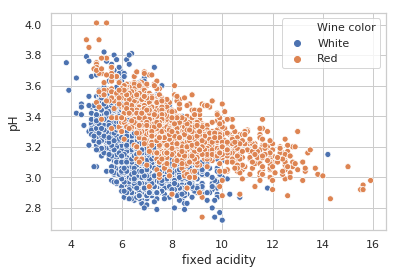

In [10]:
# fixed acidity vs pH
sns.scatterplot(x='fixed acidity', y='pH', data=df_all.toPandas(), hue='Wine color')

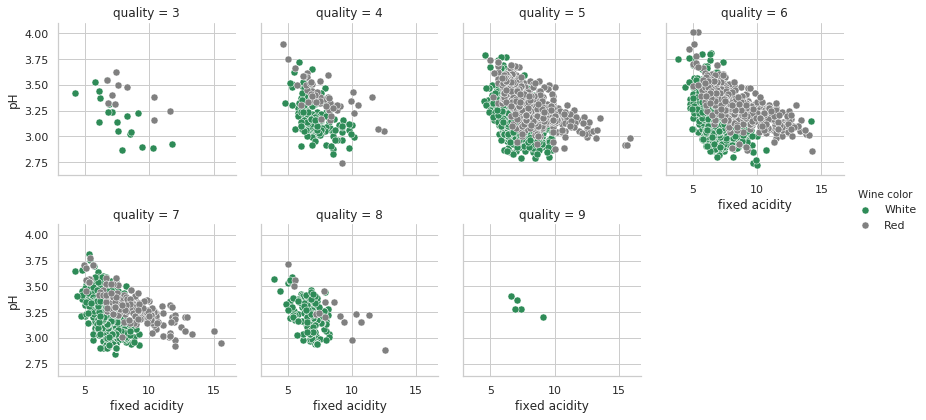

In [11]:
# scatter fixed acidity vs pH
import matplotlib.pyplot as plt
pal = {'White':"seagreen", 'Red':"gray"}
kws = dict(s=50, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(df_all.toPandas(), col="quality", hue="Wine color", palette=pal, hue_order=['White', 'Red'], col_wrap=4)
g = (g.map(plt.scatter, "fixed acidity", "pH", **kws).add_legend())

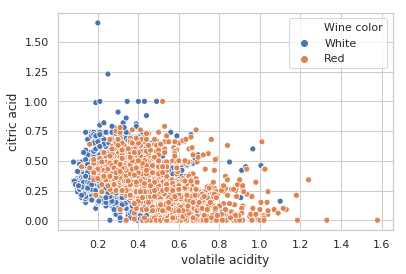

In [12]:
# citric acid vs volatile acidity
sns.scatterplot(x='volatile acidity', y='citric acid', data=df_all.toPandas(), hue='Wine color')

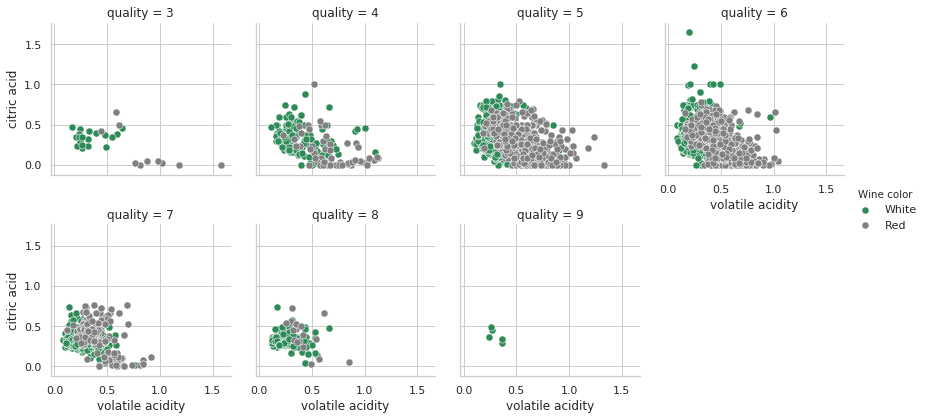

In [13]:
# scatter citric acid vs volatile acidity
import matplotlib.pyplot as plt
pal = {'White':"seagreen", 'Red':"gray"}
kws = dict(s=50, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(df_all.toPandas(), col="quality", hue="Wine color", palette=pal, hue_order=['White', 'Red'], col_wrap=4)
g = (g.map(plt.scatter, "volatile acidity", "citric acid", **kws).add_legend())

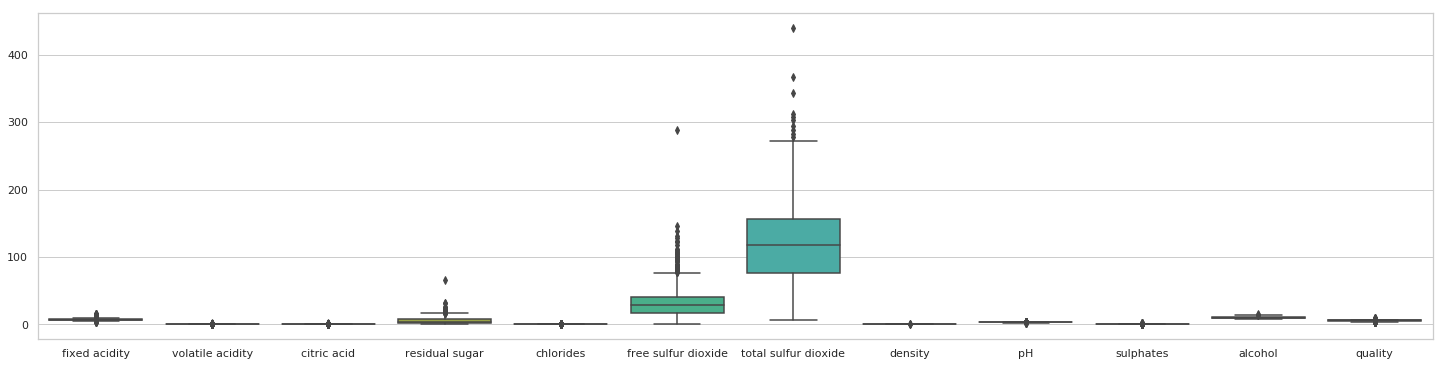

In [14]:
plt.figure(figsize=(25, 6))
sns.boxplot(data=df_all.toPandas())

In [15]:
def reject_outliers(data=pd.DataFrame(), min_thre=3, max_thre=6, filter_col=None):
    if not filter_col:
        filter_col = []

    for col in data.columns:
        if col in filter_col:
            continue
        data = data[~(operator.and_(min_thre * data[col].std() < np.abs(data[col]-data[col].mean()),
                      max_thre * data[col].std() > np.abs(data[col] - data[col].mean())))]
    return data

In [16]:
# remove outlier
df_for_o_w = df_w.select("fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide",
                         "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality")
df_w_ro = spark.createDataFrame(reject_outliers(df_for_o_w.toPandas(), filter_col=["quality"]))
df_w_ro.toPandas().describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000,4530.000000
mean,6.842064,0.271542,0.327592,6.413951,0.044376,34.960265,137.813687,0.993981,3.187631,0.485296,10.531876,5.907506
std,0.791639,0.087112,0.103242,5.023932,0.018362,15.988379,41.609207,0.002975,0.143120,0.105505,1.222818,0.869015
min,4.400000,0.080000,0.000000,0.600000,0.012000,2.000000,19.000000,0.987110,2.790000,0.220000,8.400000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.035000,23.000000,108.000000,0.991700,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.250000,0.043000,34.000000,134.000000,0.993700,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.380000,9.900000,0.050000,45.000000,167.000000,0.996075,3.280000,0.540000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.630000,0.820000,14.200000,9.000000


In [17]:
df_for_o_r = df_r.select("fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide",
                         "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality")
df_r_ro = spark.createDataFrame(reject_outliers(df_for_o_r.toPandas(), filter_col=["quality"]))
df_r_ro.toPandas().describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000
mean,8.311334,0.523141,0.265556,2.411023,0.082473,14.956462,42.912232,0.996725,3.314900,0.645563,10.414225,5.645473
std,1.641663,0.169512,0.192033,1.004150,0.027705,9.183102,28.199299,0.001701,0.142105,0.143376,1.010241,0.799000
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,35.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.630000,0.420000,2.600000,0.089000,20.000000,57.500000,0.997800,3.400000,0.720000,11.100000,6.000000
max,13.500000,1.040000,0.790000,13.900000,0.415000,46.000000,136.000000,1.002100,3.750000,1.980000,13.500000,8.000000


In [30]:
# 0 presents the white wine while 1 presnts the red wine
df_w_ro = df_w_ro.withColumn("Wine color", lit("White"))

df_r_ro = df_r_ro.withColumn("Wine color", lit("Red"))

# union the df_white and df_red
df_all = df_w_ro.unionAll(df_r_ro)
df_all.show()

# data set size
df_all.count()


+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+----------+
|fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density|  pH|sulphates|alcohol|quality|Wine color|
+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+----------+
|          7.0|            0.27|       0.36|          20.7|    0.045|               45.0|               170.0|  1.001| 3.0|     0.45|    8.8|      6|     White|
|          6.3|             0.3|       0.34|           1.6|    0.049|               14.0|               132.0|  0.994| 3.3|     0.49|    9.5|      6|     White|
|          8.1|            0.28|        0.4|           6.9|     0.05|               30.0|                97.0| 0.9951|3.26|     0.44|   10.1|      6|     White|
|          7.2|            0.23|  

5977

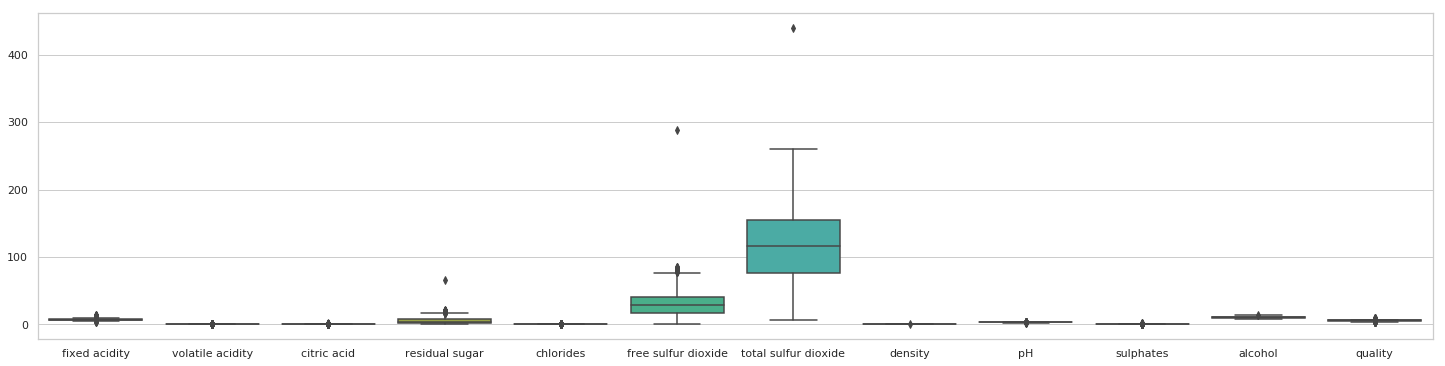

In [31]:
plt.figure(figsize=(25, 6))
sns.boxplot(data=df_all.toPandas())

In [ ]:
sns.countplot(x="quality", data=df_all.toPandas())

In [21]:
# data reclassify
df_re = df_all.withColumn("quality_N", when(df_all.quality < 6, 'bad').otherwise('good')).drop(
    df_all.quality).withColumnRenamed("quality_N", "quality")
df_re.show()

+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+----------+-------+
|fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density|  pH|sulphates|alcohol|Wine color|quality|
+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+----------+-------+
|          7.0|            0.27|       0.36|          20.7|    0.045|               45.0|               170.0|  1.001| 3.0|     0.45|    8.8|         0|   good|
|          6.3|             0.3|       0.34|           1.6|    0.049|               14.0|               132.0|  0.994| 3.3|     0.49|    9.5|         0|   good|
|          8.1|            0.28|        0.4|           6.9|     0.05|               30.0|                97.0| 0.9951|3.26|     0.44|   10.1|         0|   good|
|          7.2|            0.23|  

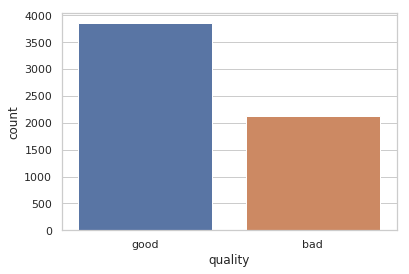

In [22]:
sns.countplot(x="quality", data=df_re.toPandas())

In [23]:
# data cleaning
print(df_re.toPandas().isnull().sum())

df_dp_na = df_re.na.drop()

df_dp_dup = df_re.drop_duplicates()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Wine color              0
quality                 0
dtype: int64


                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.234176     0.332080   
volatile acidity           0.234176          1.000000    -0.417221   
citric acid                0.332080         -0.417221     1.000000   
residual sugar            -0.127838         -0.184259     0.141788   
chlorides                  0.362584          0.442456    -0.044575   
free sulfur dioxide       -0.301074         -0.378090     0.140474   
total sulfur dioxide      -0.361558         -0.444371     0.190602   
density                    0.463575          0.322853     0.070751   
pH                        -0.221605          0.285242    -0.329417   
sulphates                  0.332493          0.257307     0.038766   
alcohol                   -0.081801         -0.070852     0.036966   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.127838   0.362584            -0.301074   
volatile acidit

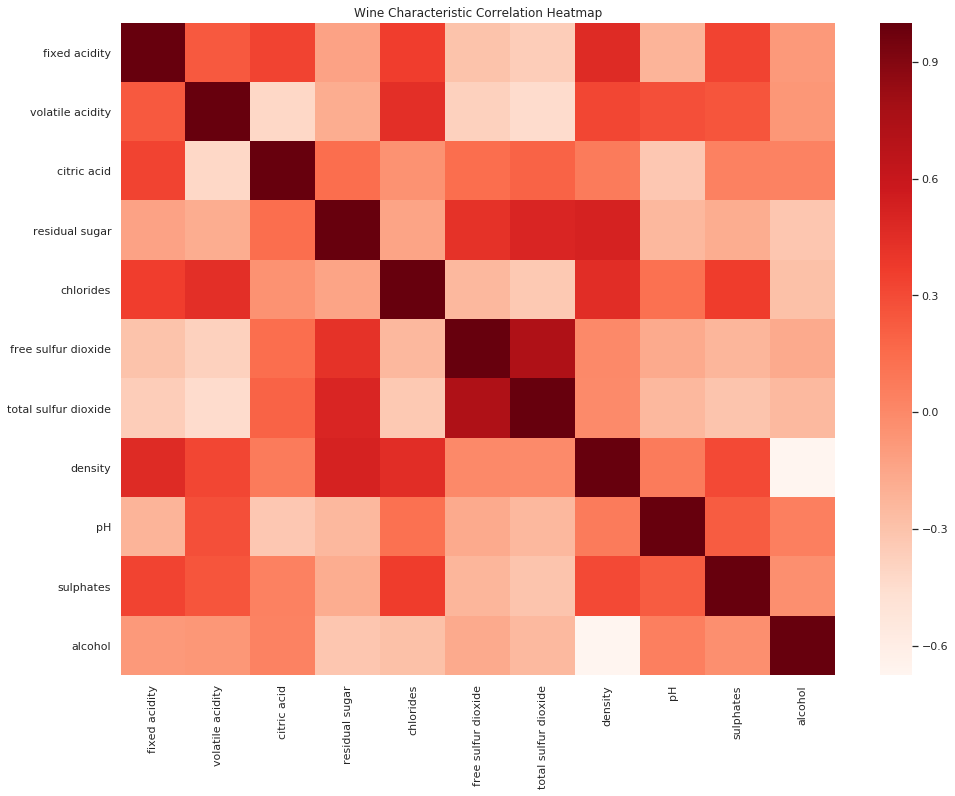

In [24]:
# data transforamtion as we can see from 
plt.subplots(figsize=(16,12))
ax = plt.axes()
ax.set_title("Wine Characteristic Correlation Heatmap")
corr = df_dp_dup.select([c for c in df_dp_dup.columns if c not in ['Wine color']]).toPandas().corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="Reds")
print(corr)
print(max(corr))

In [25]:
# reduce the entire column "total sulfur dioxide"
df_trans = df_dp_dup.select([c for c in df_dp_dup.columns if c not in ['total sulfur dioxide']])
df_trans.toPandas().describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,Wine color
count,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000
mean,7.198070,0.336065,0.312246,5.041326,0.053992,29.638473,0.994477,3.224541,0.525687,10.563747,0.251488
std,1.260511,0.158680,0.134142,4.461424,0.027832,17.011023,0.002937,0.151468,0.133944,1.165155,0.433913
min,4.400000,0.080000,0.000000,0.600000,0.012000,1.000000,0.987110,2.790000,0.220000,8.400000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.037000,16.000000,0.992120,3.120000,0.430000,9.583333,0.000000
50%,7.000000,0.290000,0.310000,2.700000,0.047000,28.000000,0.994600,3.220000,0.510000,10.400000,0.000000
75%,7.700000,0.400000,0.390000,7.500000,0.064000,41.000000,0.996700,3.330000,0.600000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.415000,289.000000,1.038980,3.750000,1.980000,14.200000,1.000000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,Wine color
count,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000
mean,7.197824,0.336564,0.313683,5.040279,0.054024,29.610450,0.994459,3.225915,0.524607,10.591818,0.256005
std,1.269676,0.158814,0.133128,4.369997,0.028821,16.514626,0.002936,0.149938,0.136529,1.171285,0.436469
min,4.400000,0.080000,0.000000,0.600000,0.012000,1.000000,0.987110,2.790000,0.220000,8.400000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.037000,17.000000,0.992000,3.120000,0.430000,9.600000,0.000000
50%,7.000000,0.290000,0.310000,2.800000,0.047000,28.000000,0.994600,3.220000,0.510000,10.500000,0.000000
75%,7.700000,0.405000,0.390000,7.400000,0.066000,40.000000,0.996800,3.330000,0.600000,11.400000,1.000000
max,13.300000,1.100000,0.780000,20.800000,0.413000,83.000000,1.002100,3.750000,1.980000,14.200000,1.000000


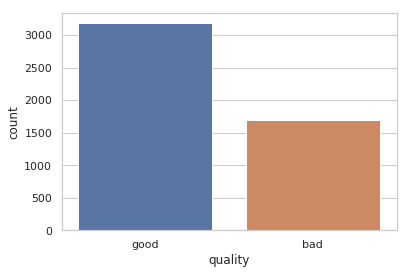

In [28]:
from sklearn.utils import resample
data_res = resample(df_trans.toPandas(), random_state=0)
data_res = spark.createDataFrame(data_res)
sns.countplot(x="quality", data=data_res.toPandas())
data_res.toPandas().describe()

In [29]:
data_res.write.csv(os.path.join(os.getcwd(), 'clean_data.csv'), mode="overwrite", header=True)